In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle



import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv("D:\Data Science\DataTrained\Evaluation_Projects\Flight_Ticket_Participant_Datasets\Data_Train.csv")

train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR _ DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU _ IXR _ BBI _ BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL _ LKO _ BOM _ COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU _ NAG _ BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR _ NAG _ DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
test_data = pd.read_csv("D:\Data Science\DataTrained\Evaluation_Projects\Flight_Ticket_Participant_Datasets\Test_set.csv")

test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL _ BOM _ COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU _ MAA _ BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL _ BOM _ COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL _ BOM _ COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR _ DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
sample = pd.read_csv("D:\Data Science\DataTrained\Evaluation_Projects\Flight_Ticket_Participant_Datasets\Sample_submission.csv")

sample.head()

,Price
0,15998
1,16612
2,25572
3,25778
4,16934


In [5]:
test = pd.concat([test_data,sample],axis=1)

In [6]:
data= pd.concat([train_data,test])

data.shape

(13354, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          13354 non-null  object
 1   Date_of_Journey  13354 non-null  object
 2   Source           13354 non-null  object
 3   Destination      13354 non-null  object
 4   Route            13353 non-null  object
 5   Dep_Time         13354 non-null  object
 6   Arrival_Time     13354 non-null  object
 7   Duration         13354 non-null  object
 8   Total_Stops      13353 non-null  object
 9   Additional_Info  13354 non-null  object
 10  Price            13354 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1.2+ MB


In [8]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
data.dropna(inplace = True)

In [10]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [12]:
data['Additional_Info'].value_counts()

No info                         10492
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

The column, Additional Info does not seems to be important for price prediction, as majority of the values are No Info. Therefore, we will drop the column.

In [13]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [14]:
data['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2191
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [15]:
data['Route'].unique()

array(['BLR _ DEL', 'CCU _ IXR _ BBI _ BLR', 'DEL _ LKO _ BOM _ COK',
       'CCU _ NAG _ BLR', 'BLR _ NAG _ DEL', 'CCU _ BLR',
       'BLR _ BOM _ DEL', 'DEL _ BOM _ COK', 'DEL _ BLR _ COK',
       'MAA _ CCU', 'CCU _ BOM _ BLR', 'DEL _ AMD _ BOM _ COK',
       'DEL _ PNQ _ COK', 'DEL _ CCU _ BOM _ COK', 'BLR _ COK _ DEL',
       'DEL _ IDR _ BOM _ COK', 'DEL _ LKO _ COK',
       'CCU _ GAU _ DEL _ BLR', 'DEL _ NAG _ BOM _ COK',
       'CCU _ MAA _ BLR', 'DEL _ HYD _ COK', 'CCU _ HYD _ BLR',
       'DEL _ COK', 'CCU _ DEL _ BLR', 'BLR _ BOM _ AMD _ DEL',
       'BOM _ DEL _ HYD', 'DEL _ MAA _ COK', 'BOM _ HYD',
       'DEL _ BHO _ BOM _ COK', 'DEL _ JAI _ BOM _ COK',
       'DEL _ ATQ _ BOM _ COK', 'DEL _ JDH _ BOM _ COK',
       'CCU _ BBI _ BOM _ BLR', 'BLR _ MAA _ DEL',
       'DEL _ GOI _ BOM _ COK', 'DEL _ BDQ _ BOM _ COK',
       'CCU _ JAI _ BOM _ BLR', 'CCU _ BBI _ BLR', 'BLR _ HYD _ DEL',
       'DEL _ TRV _ COK', 'CCU _ IXR _ DEL _ BLR',
       'DEL _ IXU _ BOM _ COK', 'CCU 

In [16]:
data['Route'].value_counts()

DEL _ BOM _ COK                3000
BLR _ DEL                      1941
CCU _ BOM _ BLR                1232
CCU _ BLR                       896
BOM _ HYD                       785
                               ... 
BOM _ JLR _ HYD                   1
BOM _ NDC _ HYD                   1
BOM _ COK _ MAA _ HYD             1
BOM _ JDH _ JAI _ DEL _ HYD       1
BOM _ IXC _ DEL _ HYD             1
Name: Route, Length: 132, dtype: int64

Total 132 routes are there. Which contains information about Source, Destination and Number of Stops.
We already have these columns, therefore we can drop the "Route" column.

In [17]:
data = data.drop(['Route', 'Additional_Info'], axis=1)

data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302


In [18]:
# Extract the Day and Month from Date_of_Journey column.

data['Day']= data['Date_of_Journey'].str.split('/').str[0]
data['Month']= data['Date_of_Journey'].str.split('/').str[1]

data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,03
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,05
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,06
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,05
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,01,03


In [19]:
#Converting the datatype for newly created features

data['Day'] = data['Day'].astype(int)
data['Month'] = data['Month'].astype(int)

In [20]:
#Extracting Hours
data["Departure_Hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
data["Departure_Min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute
    
data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month,Departure_Hour,Departure_Min
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,22,20
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3,16,50


In [21]:
#Extracting Hours
data["Arrival_Hour"] = pd.to_datetime(train_data["Arrival_Time"]).dt.hour

# Extracting Minutes
data["Arrival_Min"] = pd.to_datetime(train_data["Arrival_Time"]).dt.minute
    
data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3,16,50,21,35


Time taken by plane to reach destination is called Duration. It is the differnce betwwen Departure Time and Arrival time

In [22]:
# Assigning and converting Duration column into list
duration = list(data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [23]:
# Adding duration_hours and duration_mins list to train_data dataframe

data["Duration_Hours"] = duration_hours
data["Duration_Mins"] = duration_mins

data.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Day,Month,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,1,3,16,50,21,35,4,45


Now since we have changed Dep_Time, Arrival_Time, Duration and Date_of_Journey columns, we can drop them.

In [24]:
data = data.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration'], axis=1)

data.head()

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [25]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [26]:
data['Total_Stops'] = data['Total_Stops'].map({'non-stop' : 0, '1 stop' :1, '2 stops': 2,'3 stops': 3, '4 stops': 4})

data.head()

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


Jet Airways                          4746
IndiGo                               2564
Air India                            2191
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64


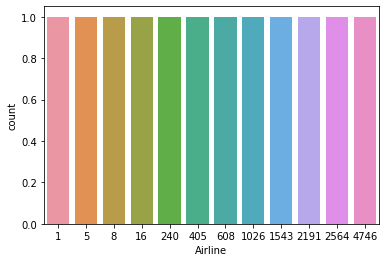

In [27]:
sns.countplot(data['Airline'].value_counts())
print(data['Airline'].value_counts())

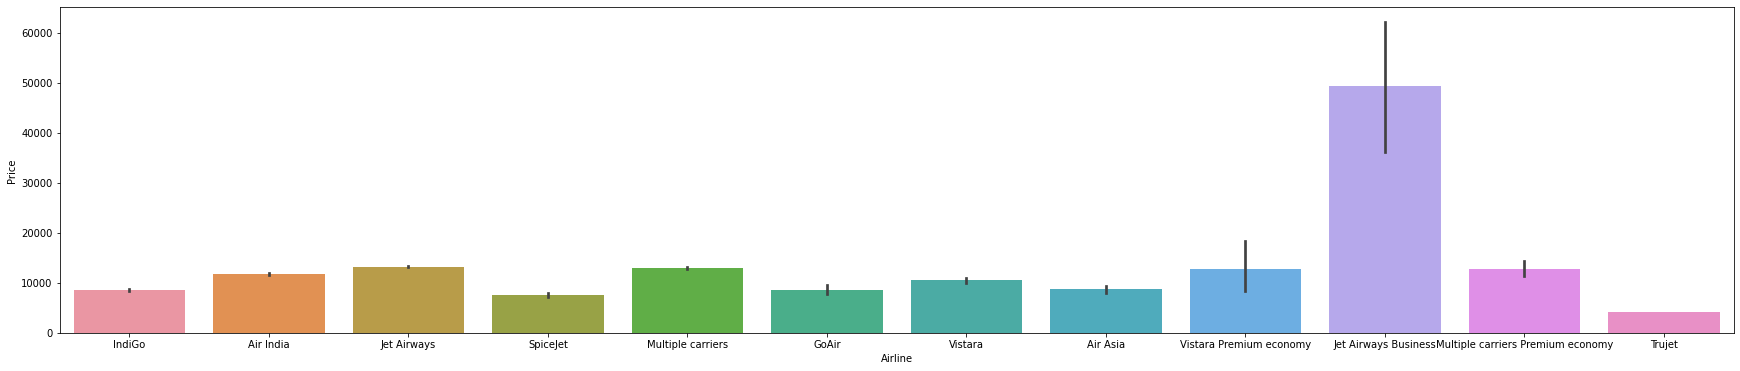

In [28]:
plt.figure(figsize=(30,6))
sns.barplot(x = data['Airline'], y=data['Price'])
plt.show()

It is evident that the Jet Airways Business has the highest fare amongst all other Airlines.

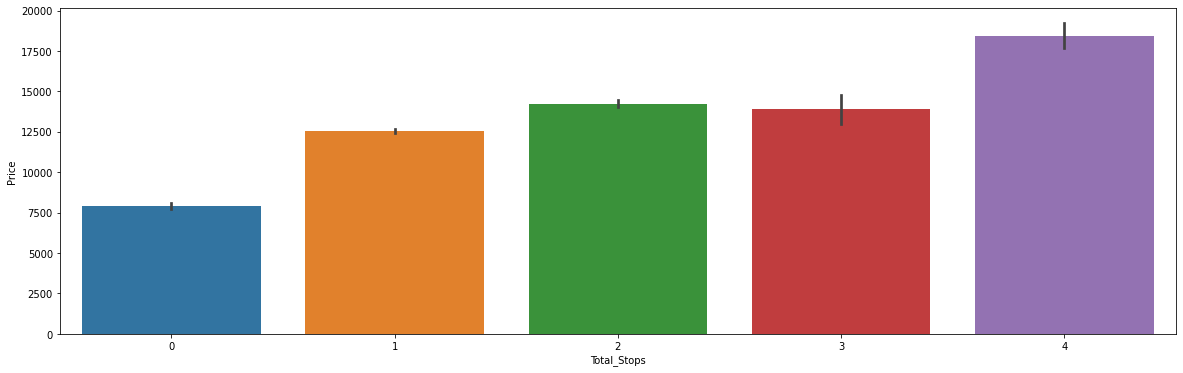

In [29]:
plt.figure(figsize=(20,6))
sns.barplot(x = data['Total_Stops'], y=data['Price'])
plt.show()

We can see from the above graph that, More the number of stops, higher is the price.

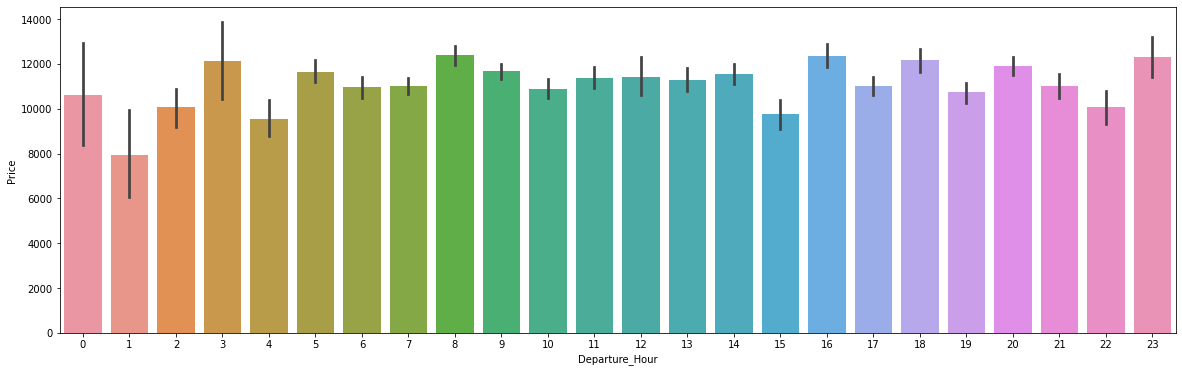

In [30]:
plt.figure(figsize=(20,6))
sns.barplot(x = data['Departure_Hour'], y=data['Price'])
plt.show()

There is no pattern between departure hour and the flight price.

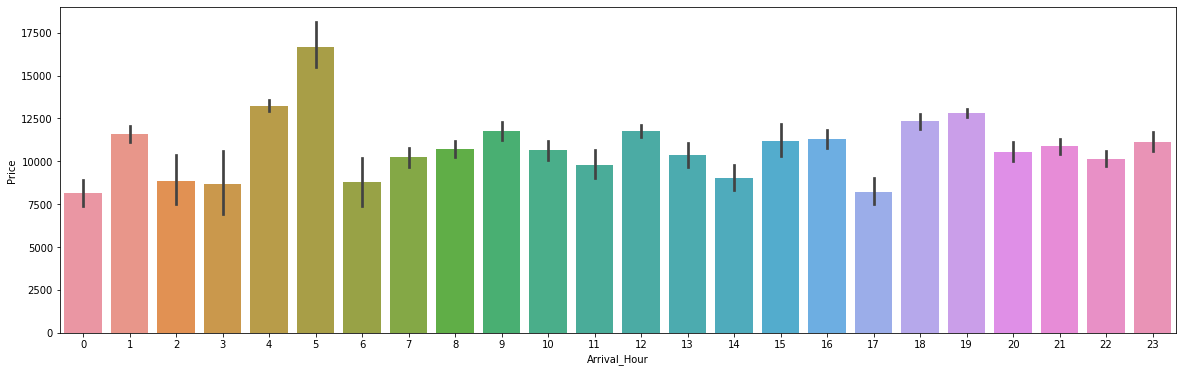

In [31]:
plt.figure(figsize=(20,6))
sns.barplot(x = data['Arrival_Hour'], y=data['Price'])
plt.show()

The highest price is for the Arrival time at 4 & 5, But there is no such pattern for others.

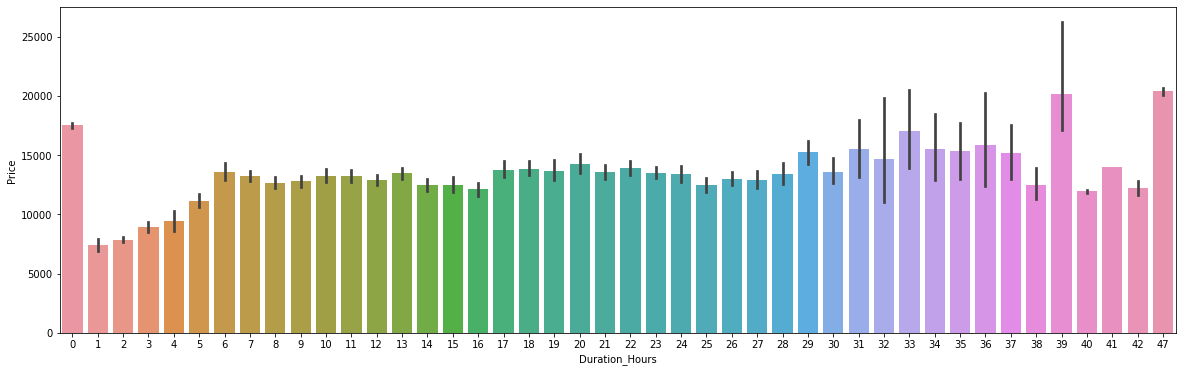

In [32]:
plt.figure(figsize=(20,6))
sns.barplot(x = data['Duration_Hours'], y=data['Price'])
plt.show()

The flight journey duration does not impact much on flight price.

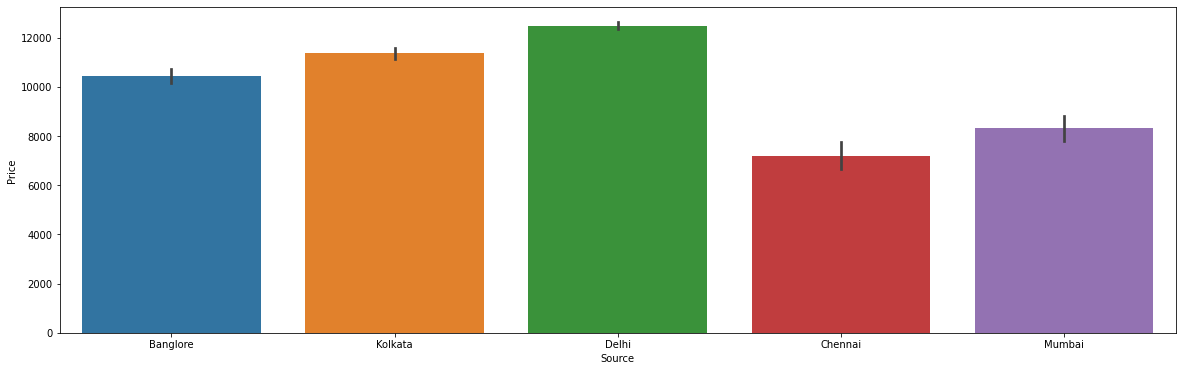

In [33]:
plt.figure(figsize=(20,6))
sns.barplot(x = data['Source'], y=data['Price'])
plt.show()

Flights starting from delhi has the highest price, followed by Kolkata and Banglore.

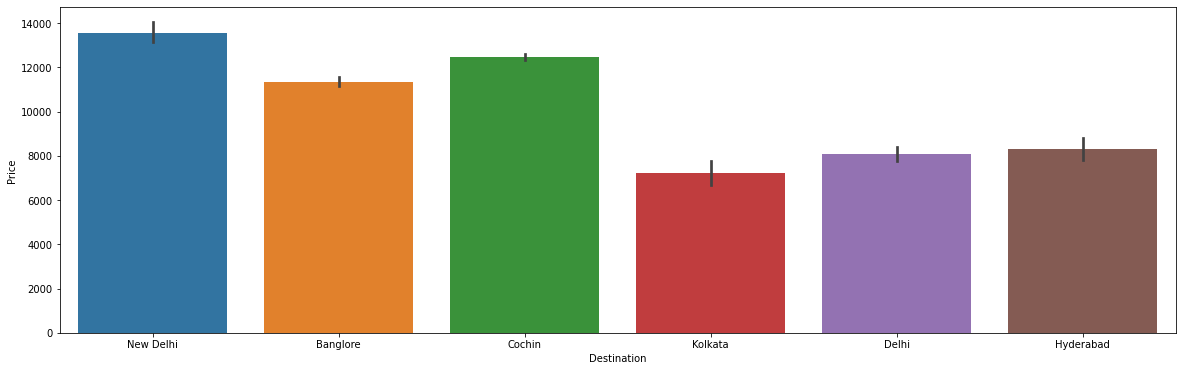

In [34]:
plt.figure(figsize=(20,6))
sns.barplot(x = data['Destination'], y=data['Price'])
plt.show()

The Flights landing in New delhi, has the highest flight price. 

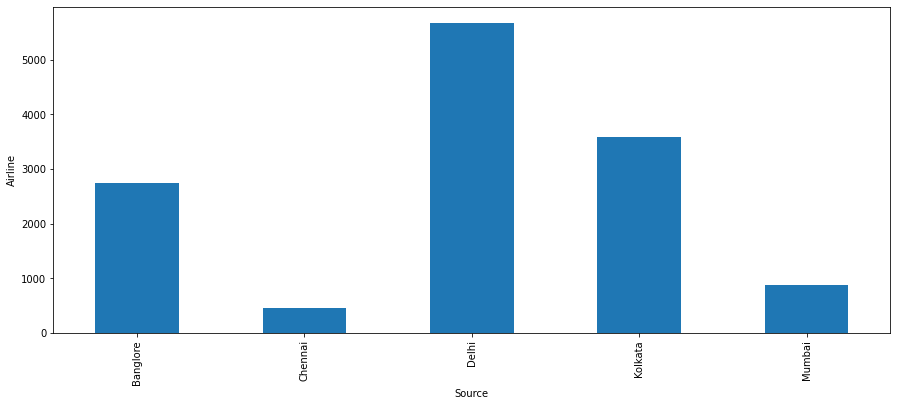

In [35]:
fig = plt.figure(figsize=(15,6))
ax = data.groupby('Source').Airline.count().plot.bar()
ax.set_ylabel('Airline')
plt.show()

Delhi has the highest number of airlines, this could be the reason for high Flight price in Delhi.

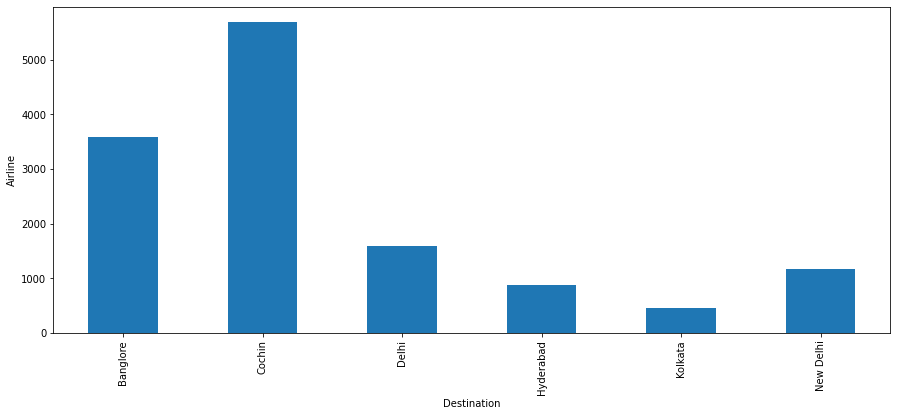

In [36]:
fig = plt.figure(figsize=(15,6))
ax = data.groupby('Destination').Airline.count().plot.bar()
ax.set_ylabel('Airline')
plt.show()

Cochin as a destination has the maximum number of Airlines, whereas Delhi as a destination has the maximum flight price.

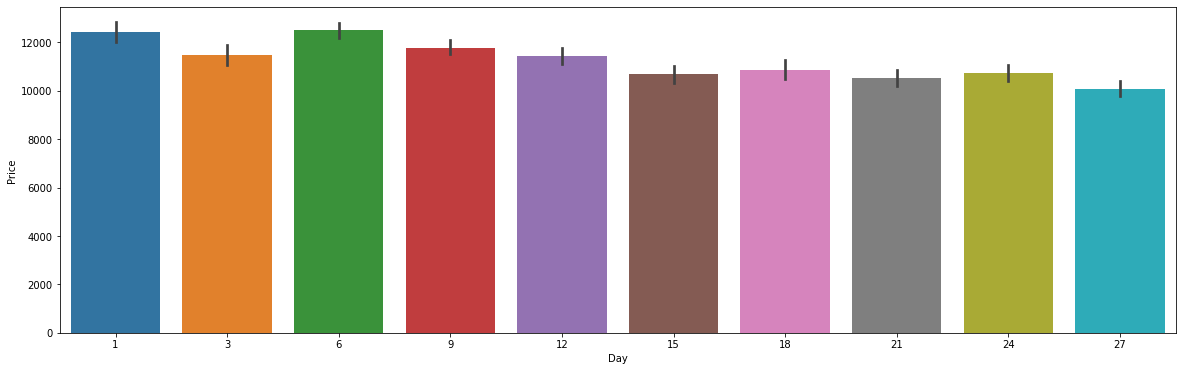

In [37]:
plt.figure(figsize=(20,6))
sns.barplot(x = data['Day'], y=data['Price'])
plt.show()

It can be seen as, In the first half of the month, flight prices are more whereas in the second half the prices are reduced. It may happen because of the end of the month offers and promotions provided by the Airlines Industries.

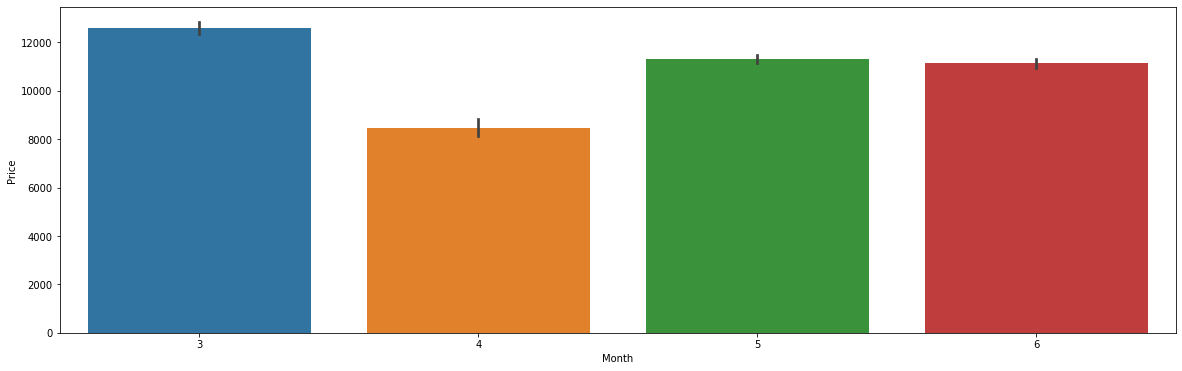

In [38]:
plt.figure(figsize=(20,6))
sns.barplot(x = data['Month'], y=data['Price'])
plt.show()

Monthwise there is no such pattern present for the price.

### Data Encoding

In [39]:
# Encoding Dataset

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()

elements = data.select_dtypes(include=['object']).columns

elements

Index(['Airline', 'Source', 'Destination'], dtype='object')

In [40]:
for i in elements:
    data[i] = enc.fit_transform(data[i])

In [41]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Departure_Hour,Departure_Min,Arrival_Hour,Arrival_Min,Duration_Hours,Duration_Mins
0,3,0,5,0,3897,24,3,22,20,1,10,2,50
1,1,3,0,2,7662,1,5,5,50,13,15,7,25
2,4,2,1,2,13882,9,6,9,25,4,25,19,0
3,3,3,0,1,6218,12,5,18,5,23,30,5,25
4,3,0,5,1,13302,1,3,16,50,21,35,4,45


In [42]:
data.shape

(13353, 13)

In [43]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Airline,13353.0,3.977308,2.363945,0.0,3.0,4.0,4.0,11.0
Source,13353.0,1.954093,1.178652,0.0,2.0,2.0,3.0,4.0
Destination,13353.0,1.435483,1.473418,0.0,0.0,1.0,2.0,5.0
Total_Stops,13353.0,0.826032,0.674632,0.0,0.0,1.0,1.0,4.0
Price,13353.0,11302.006216,6452.999958,1759.0,6135.0,10262.0,14781.0,79512.0
Day,13353.0,13.390399,8.439134,1.0,6.0,12.0,21.0,27.0
Month,13353.0,4.710552,1.165662,3.0,3.0,5.0,6.0,6.0
Departure_Hour,13353.0,12.506403,5.754994,0.0,8.0,11.0,18.0,23.0
Departure_Min,13353.0,24.461544,18.774581,0.0,5.0,25.0,40.0,55.0
Arrival_Hour,13353.0,13.324272,6.854124,0.0,8.0,14.0,19.0,23.0


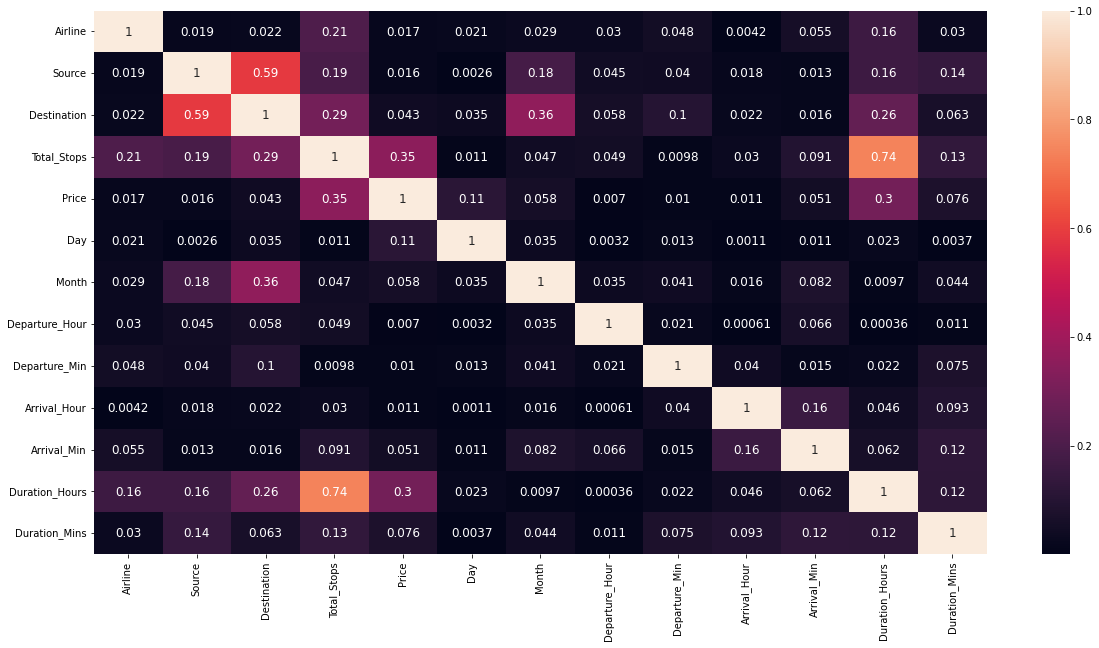

In [44]:
data_corr = data.corr().abs()

plt.figure(figsize = (20,10))
sns.heatmap(data_corr, annot = True, annot_kws={'size':12})
plt.show()

The highest value for correlation matrix is 0.74 between Durartion_Hours and Total_Stops. Apart from that there is no such column with high correlation value.
We will also check for multicollinearity using VIF.

#### Checking Skewness and Outliers

In [45]:
x = data.drop(['Price'], axis=1)
y = data['Price']

In [46]:
print(x.shape)
print(y.shape)

(13353, 12)
(13353,)


In [47]:
x.skew().sort_values(ascending = False)

Destination       1.247794
Duration_Hours    0.857694
Airline           0.720892
Total_Stops       0.317844
Departure_Min     0.162933
Day               0.135002
Departure_Hour    0.115843
Arrival_Min       0.109778
Duration_Mins    -0.093402
Arrival_Hour     -0.360197
Month            -0.390617
Source           -0.424126
dtype: float64

Keeping +/- 0.5 as the range for skewness, here are the columns which are beyond the range.

- Destination - Categorical
- Duration_Hours - Continuous
- Airline - Categorical

Only one column is having continuous data and has skewness beyond the range. Therefore we will treat the skewness.

In [48]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x)

In [49]:
pd.DataFrame(x_new, columns = x.columns).skew().sort_values(ascending = False)

Destination       0.041220
Airline          -0.017090
Duration_Hours   -0.030512
Total_Stops      -0.059265
Departure_Hour   -0.103196
Day              -0.198695
Month            -0.218645
Source           -0.238265
Arrival_Min      -0.346775
Arrival_Hour     -0.351754
Departure_Min    -0.360594
Duration_Mins    -0.375783
dtype: float64

In [50]:
x = pd.DataFrame(x_new, columns = x.columns)

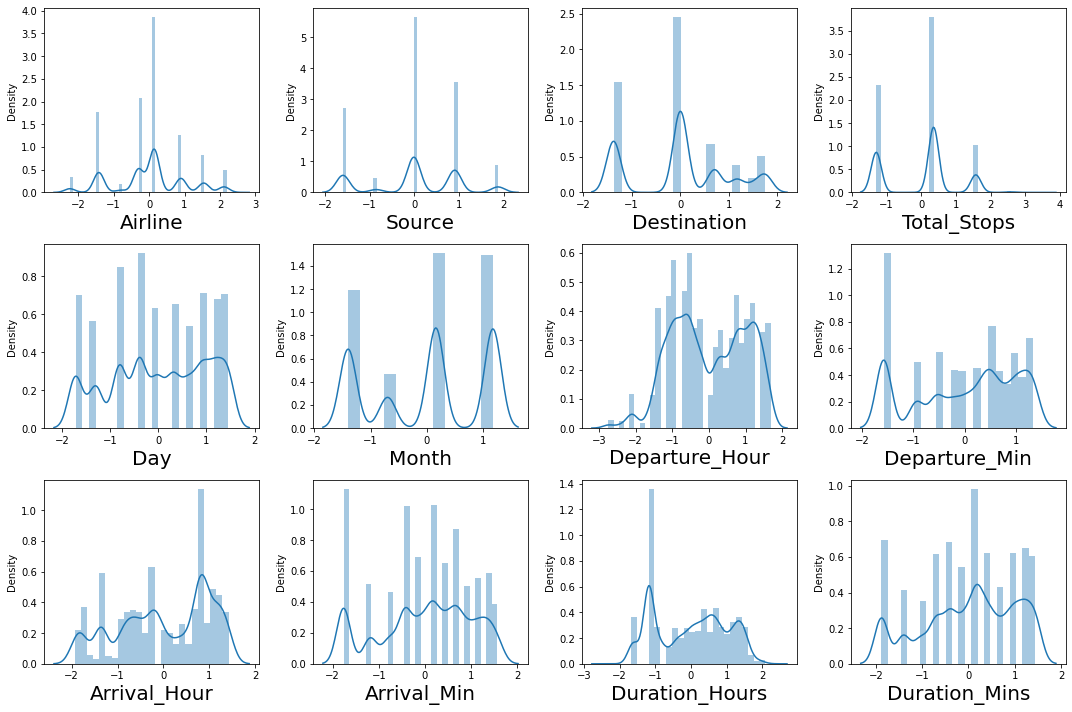

In [51]:
plt.figure(figsize = (15,10))
plotnumber = 1

for column in x:
    if plotnumber <= 12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

Now the skewness is removed from the data. We can proceed ahead for Data Cleaning.

### Checking Outliers

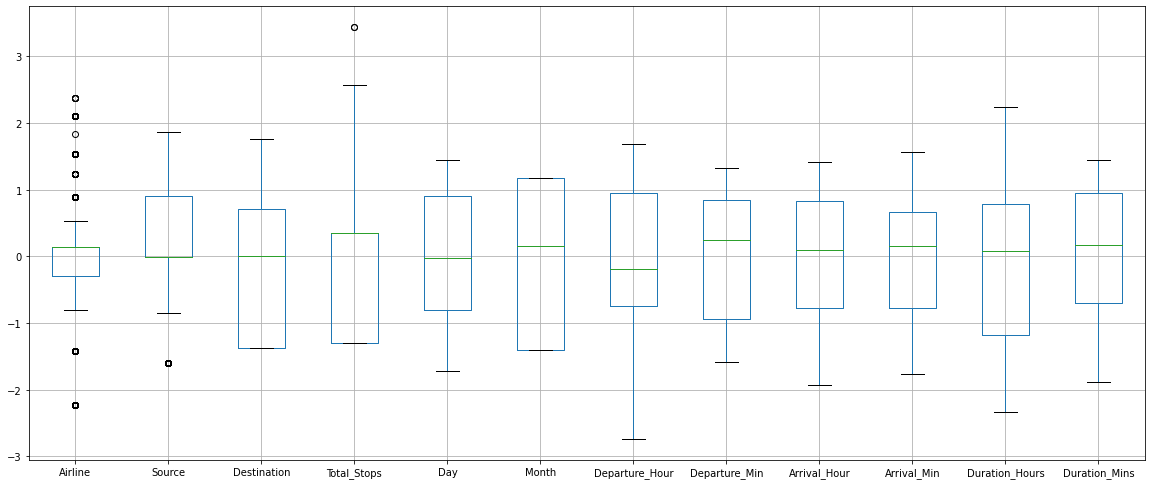

In [52]:
x.iloc[:,:].boxplot(figsize = (20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

In [53]:
from scipy.stats import zscore

print('High Side Outliers present')
print((zscore(x)<3).all())

print('****************************************')

print('Low Side Outliers Present')
print((zscore(x)>-3).all())

High Side Outliers present
Airline            True
Source             True
Destination        True
Total_Stops       False
Day                True
Month              True
Departure_Hour     True
Departure_Min      True
Arrival_Hour       True
Arrival_Min        True
Duration_Hours     True
Duration_Mins      True
dtype: bool
****************************************
Low Side Outliers Present
Airline           True
Source            True
Destination       True
Total_Stops       True
Day               True
Month             True
Departure_Hour    True
Departure_Min     True
Arrival_Hour      True
Arrival_Min       True
Duration_Hours    True
Duration_Mins     True
dtype: bool


Total_stops is a column with categorical data. Therefore we will consider this as an outlier. Apart from that, There is no other column having Outliers.

#### Checking Multicollinearity Using VIF

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(x_scaled, i) for i in range (x_scaled.shape[1])]

vif['features'] = x.columns


# Lets check the values 
vif

,vif,features
0,1.049245,Airline
1,1.679606,Source
2,1.899267,Destination
3,3.770435,Total_Stops
4,1.003003,Day
5,1.084317,Month
6,1.022313,Departure_Hour
7,1.019090,Departure_Min
8,1.053549,Arrival_Hour
9,1.088095,Arrival_Min


The VIF values for our dataset lies well below the considerable range. Therefore we can consider that there is no Multicollinearity Exist in our dataset.

WE can proceed ahead for Model Building.

# Model Building

In [56]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [57]:
max_r2_score = 0
maxRS = 0
model = [LinearRegression(),
         DecisionTreeRegressor(),
         KNeighborsRegressor(),
         RandomForestRegressor(),
         xgb.XGBRegressor()]

for r_state in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = r_state)
    for i in model:
        i.fit(x_train, y_train)
        y_pred = i.predict(x_test)
        r2score = r2_score(y_test,y_pred)
        print('r2_score', r2score*100,'%', 'random_state', r_state, 'Model', i)
        if r2score > max_r2_score:
            max_r2_score = r2score
            maxRS = r_state
            final_model = i

            
print("max R2 score corresponds to random state: ", maxRS, 'is', max_r2_score, "and Model is: ", final_model)

r2_score 17.484460683994808 % random_state 1 Model LinearRegression()
r2_score 40.45204968950665 % random_state 1 Model DecisionTreeRegressor()
r2_score 40.561168758272956 % random_state 1 Model KNeighborsRegressor()
r2_score 68.31236170635174 % random_state 1 Model RandomForestRegressor()
r2_score 65.37579500813871 % random_state 1 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
  

r2_score 36.91894240532583 % random_state 9 Model KNeighborsRegressor()
r2_score 66.29749186204643 % random_state 9 Model RandomForestRegressor()
r2_score 63.802257949673645 % random_state 9 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 17.693675813511668 % random_state 10 Model LinearRegression()
r2_score 35.030373954626434 % random_state 

r2_score 36.67669505678225 % random_state 17 Model KNeighborsRegressor()
r2_score 64.42060866221301 % random_state 17 Model RandomForestRegressor()
r2_score 63.746451174827 % random_state 17 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 16.998635682945984 % random_state 18 Model LinearRegression()
r2_score 38.96162502587548 % random_state 1

r2_score 32.97230261108199 % random_state 25 Model KNeighborsRegressor()
r2_score 63.92578923959987 % random_state 25 Model RandomForestRegressor()
r2_score 62.047422341389904 % random_state 25 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 16.592323526468768 % random_state 26 Model LinearRegression()
r2_score 39.189038023978306 % random_sta

r2_score 35.968822955147715 % random_state 33 Model KNeighborsRegressor()
r2_score 65.42264337520407 % random_state 33 Model RandomForestRegressor()
r2_score 63.136575657666484 % random_state 33 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 15.743651046048434 % random_state 34 Model LinearRegression()
r2_score 34.652725232579876 % random_st

r2_score 40.27437438548528 % random_state 41 Model KNeighborsRegressor()
r2_score 67.13668778739205 % random_state 41 Model RandomForestRegressor()
r2_score 63.82083823735434 % random_state 41 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 16.603019426151413 % random_state 42 Model LinearRegression()
r2_score 30.817337789829892 % random_stat

r2_score 34.92660078931511 % random_state 49 Model KNeighborsRegressor()
r2_score 64.2428461068714 % random_state 49 Model RandomForestRegressor()
r2_score 60.12148704305913 % random_state 49 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 15.491569828093155 % random_state 50 Model LinearRegression()
r2_score 36.387297875542544 % random_state

r2_score 34.80786762014788 % random_state 57 Model KNeighborsRegressor()
r2_score 65.70861424311677 % random_state 57 Model RandomForestRegressor()
r2_score 63.46152975400183 % random_state 57 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 16.413053972040505 % random_state 58 Model LinearRegression()
r2_score 43.759212318120944 % random_stat

r2_score 37.918837921463364 % random_state 65 Model KNeighborsRegressor()
r2_score 64.1509331622679 % random_state 65 Model RandomForestRegressor()
r2_score 65.67178235936922 % random_state 65 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 16.90360514315754 % random_state 66 Model LinearRegression()
r2_score 40.54204759862896 % random_state 

r2_score 35.514335979857805 % random_state 73 Model KNeighborsRegressor()
r2_score 68.03707036542426 % random_state 73 Model RandomForestRegressor()
r2_score 65.11474569897906 % random_state 73 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 15.024089263200446 % random_state 74 Model LinearRegression()
r2_score 40.16561881246832 % random_stat

r2_score 35.48967413340064 % random_state 81 Model KNeighborsRegressor()
r2_score 67.11266862368838 % random_state 81 Model RandomForestRegressor()
r2_score 64.20335609117224 % random_state 81 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 16.262139701522006 % random_state 82 Model LinearRegression()
r2_score 29.933367668093204 % random_stat

r2_score 37.829237236197244 % random_state 89 Model KNeighborsRegressor()
r2_score 66.61988728328929 % random_state 89 Model RandomForestRegressor()
r2_score 63.42642378084356 % random_state 89 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 16.382167278490446 % random_state 90 Model LinearRegression()
r2_score 37.42847754640278 % random_stat

r2_score 34.729414045542015 % random_state 97 Model KNeighborsRegressor()
r2_score 63.71183357408997 % random_state 97 Model RandomForestRegressor()
r2_score 63.17292037492488 % random_state 97 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 16.714630760544225 % random_state 98 Model LinearRegression()
r2_score 39.034833809856664 % random_sta

r2_score 40.26897226907198 % random_state 105 Model KNeighborsRegressor()
r2_score 67.79599260340441 % random_state 105 Model RandomForestRegressor()
r2_score 66.58770036437292 % random_state 105 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 13.94532674142227 % random_state 106 Model LinearRegression()
r2_score 41.31060827134006 % random_st

r2_score 34.808135421529094 % random_state 113 Model KNeighborsRegressor()
r2_score 64.30182681171527 % random_state 113 Model RandomForestRegressor()
r2_score 63.75729811298157 % random_state 113 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 16.034486705163687 % random_state 114 Model LinearRegression()
r2_score 32.48034624404723 % random_

r2_score 35.12197104871255 % random_state 121 Model KNeighborsRegressor()
r2_score 67.25515229986568 % random_state 121 Model RandomForestRegressor()
r2_score 65.2999348395753 % random_state 121 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 16.70404600207491 % random_state 122 Model LinearRegression()
r2_score 40.20222132498815 % random_sta

r2_score 32.94309564284576 % random_state 129 Model KNeighborsRegressor()
r2_score 63.53770438712915 % random_state 129 Model RandomForestRegressor()
r2_score 61.885168493286336 % random_state 129 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 13.835418812199263 % random_state 130 Model LinearRegression()
r2_score 37.72588547621617 % random_

r2_score 36.26948224603282 % random_state 137 Model KNeighborsRegressor()
r2_score 67.91547087430881 % random_state 137 Model RandomForestRegressor()
r2_score 65.93456472033432 % random_state 137 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 14.856650962375184 % random_state 138 Model LinearRegression()
r2_score 40.27176400658278 % random_s

r2_score 33.02173136559641 % random_state 145 Model KNeighborsRegressor()
r2_score 64.95901636263173 % random_state 145 Model RandomForestRegressor()
r2_score 63.86221516194863 % random_state 145 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 16.557257476423736 % random_state 146 Model LinearRegression()
r2_score 35.43389259731664 % random_s

r2_score 33.21708919876932 % random_state 153 Model KNeighborsRegressor()
r2_score 60.31150719560807 % random_state 153 Model RandomForestRegressor()
r2_score 59.146301356624456 % random_state 153 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 15.134066355406784 % random_state 154 Model LinearRegression()
r2_score 34.22118803791413 % random_

r2_score 36.07247441544451 % random_state 161 Model KNeighborsRegressor()
r2_score 66.03875472389913 % random_state 161 Model RandomForestRegressor()
r2_score 63.438670000434286 % random_state 161 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 15.360263565453526 % random_state 162 Model LinearRegression()
r2_score 32.97337081079736 % random_

r2_score 35.33481005141681 % random_state 169 Model KNeighborsRegressor()
r2_score 65.75041151005563 % random_state 169 Model RandomForestRegressor()
r2_score 64.30628913410472 % random_state 169 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 18.712229290497294 % random_state 170 Model LinearRegression()
r2_score 34.00309269759829 % random_s

r2_score 33.31773976842881 % random_state 177 Model KNeighborsRegressor()
r2_score 64.56021775340916 % random_state 177 Model RandomForestRegressor()
r2_score 62.65107258487146 % random_state 177 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 16.535295220365143 % random_state 178 Model LinearRegression()
r2_score 35.07104910600155 % random_s

r2_score 37.76222489808988 % random_state 185 Model KNeighborsRegressor()
r2_score 64.23862680408502 % random_state 185 Model RandomForestRegressor()
r2_score 63.16236618728836 % random_state 185 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 16.03578897700919 % random_state 186 Model LinearRegression()
r2_score 29.773738574953022 % random_s

r2_score 37.426156881657256 % random_state 193 Model KNeighborsRegressor()
r2_score 64.73771603727342 % random_state 193 Model RandomForestRegressor()
r2_score 63.52573011079479 % random_state 193 Model XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)
r2_score 14.442885270927508 % random_state 194 Model LinearRegression()
r2_score 34.37142863202518 % random_

In [58]:
print("max R2 score corresponds to random state: ", maxRS, 'is', max_r2_score, "and Model is: ", final_model)

max R2 score corresponds to random state:  136 is 0.6834385964422562 and Model is:  RandomForestRegressor()


RandomForestRegressor is the best model with highest R2 Score, therefore we will perform Parameter tuning using GridSearchCV on RandomForestRegressor.

In [59]:
from sklearn.model_selection import cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 136)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print('R2 Score: ', r2_score(y_test, y_pred))

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

r2score = r2_score(y_test, y_pred)

for i in range (2,11):
    cvscore = cross_val_score(rf, x_scaled, y, cv = i)
    cvs = cvscore.mean()
    print("At CV:", i)
    print("Cross Validation Score is: ", cvs*100)
    print("R2_Score is : ", r2score)

R2 Score:  0.6861971100899102
Mean Squared Error:  12384406.794235451
At CV: 2
Cross Validation Score is:  13.428899250348358
R2_Score is :  0.6861971100899102
At CV: 3
Cross Validation Score is:  16.126361403953567
R2_Score is :  0.6861971100899102
At CV: 4
Cross Validation Score is:  4.238535291525592
R2_Score is :  0.6861971100899102
At CV: 5
Cross Validation Score is:  -52.66731294819864
R2_Score is :  0.6861971100899102
At CV: 6
Cross Validation Score is:  14.334932348621887
R2_Score is :  0.6861971100899102
At CV: 7
Cross Validation Score is:  29.740851951788848
R2_Score is :  0.6861971100899102
At CV: 8
Cross Validation Score is:  35.98173476587881
R2_Score is :  0.6861971100899102
At CV: 9
Cross Validation Score is:  38.31526624703703
R2_Score is :  0.6861971100899102
At CV: 10
Cross Validation Score is:  30.10204006560604
R2_Score is :  0.6861971100899102


In [60]:
cvscore_selected = cross_val_score(rf, x_scaled, y, cv = 9).mean()
print("The CV Score is: ", cvscore_selected, "\nThe R2_Score is: ", r2score)

The CV Score is:  0.38242651839758723 
The R2_Score is:  0.6861971100899102


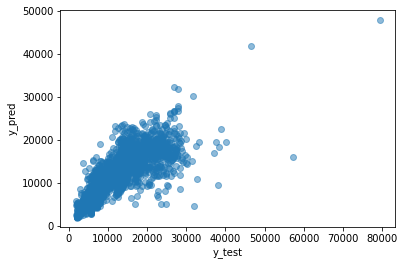

In [61]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [62]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2119.2917915570583
MSE: 12384406.794235451
RMSE: 3519.1485893942377


In [63]:
metrics.r2_score(y_test, y_pred)

0.6861971100899102

### Parameter Tuning using GridSearchCV

In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = {"min_samples_split": list(range(2,11)),
              "min_samples_leaf" : list(range(1,10)),
              "max_depth":list(range(1,200)),
              "n_estimators": list(range(1,500))}

grd = GridSearchCV(rf, param_grid = param_grid)
grd.fit(x_train, y_train)

print('Best Param ==>', grd.best_params_)

rf = grd.best_estimator_

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)


print('R2 Score: ', rf.score(x_test, y_test))

print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))

Best Param ==> {'max_depth': 11, 'min_samples_leaf': 0.1, 'min_samples_split': 0.1, 'n_estimators': 70}
R2 Score:  0.17280604171800495
Mean Squared Error:  32645672.82995143


RandomForestRegressor has R2_Score value of 68.61 before parameter tuning, and after parameter tuning it is reduced to 17.28%. Which means Hyper Parameter Tuning does not improve Model Accuracy.

<AxesSubplot:xlabel='Price', ylabel='Density'>

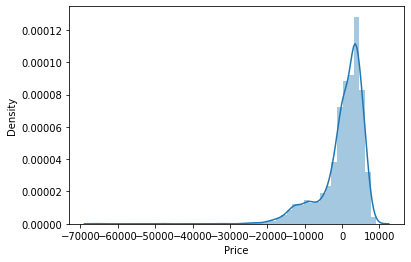

In [66]:
#checking distribution on the test dataset
sns.distplot(rf.predict(x_test) - y_test)

we are getting a normal distribution curve which means that our model Random Forest Regressor is performing correctly.

In [67]:
# Saving the Model

import joblib
joblib.dump(rf, "Flight_Price_Prediction.pkl")

['Flight_Price_Prediction.pkl']